Capstone Project Modul 3
### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **1_Business Problem Understanding**

**1_1_Context**
<br><br>
Asuransi adalah sebuah alat keselamatan/proteksi dari kehilangan secara finansial. Asuransi bekerja dengan cara pemegang asuransi dapat membayar iuran/premi secara konstan (biasanya per bulan), dan dapat mencairkan asuransi saat suatu kerugian terjadi. Tipe kerugian yang dapat di tanggung oleh sebuah perusahaan asuransi dapat di sepakati terlebih dahulu, serta berapa banyak jumlah / presentasi dari kerugian yang dapat di tanggung.

Salah satu asuransi yang paling umum adalah asurans mobil, dimana perusahaan dapat membantu membayar kerusakan pada sebuah mobil yang dimiliki seorang pemegang asuransi. Tanggungan yang diberi perusahaan untuk pemegang asuransi dapat berupa pembayaran untuk kehilangan, kerusakan kecil, ataupun kerusakan total. Semua jenis & jumlah tanggungan yang diberi akan di sepakati terlebih dahulu, seperti layaknya asuransi lain. 

**1_2_Problem Statement**
<br><br>
Sebagai perusahaan asuransi, terbitlah sebuah kesulitan untuk menentukan keuntungan yang dibuat dari penjualan asuransi. Dengan itu, munculah 'Customer Lifetime Value' yang membantu memberi gambaran pengembalian finansial & investment dari customer, secara jangka pendek & jangka panjang. **Dengan itu, kemampuan untuk dapat memprediksi 'Customer Lifetime Value' menjadi sangat penting, agar sebuah perusahaan dapat menentukan apakah calon pemegang asuransi akan menciptakan keuntungan selama menjadi customer**


**1_3_Goals**
<br><br>
Berdasarkan permasalahan tersebut, Sebuah perusahaan asuransi harus memiliki kemampuan untuk **meprediksi & menentukan angka 'Customer Lifetime Value'.** Adanya perbedaan pada berbagai fitur yang terdapat pada suatu customer, seperti tipe kendaraan, penghasilan pemilik, status kerja pemilik dapat menambah keakuratan prediksi 'Customer Lifetime Value' yang mana dapat mendatangkan profit bagi penjual asuransi.

**1_4_Analytic Approach**
<br><br>
Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan customer dengan yang lainnya. 

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan 'tool' memprediksi 'Customer Lifetime Value' dari setiap customer / calon customer, yang akan berguna untuk melihat keuntungan jarak pendek & panjang dari setiap customer.

**1_5_Metric Evaluation**
<br><br>
Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi CLV sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

### **2_Data Understanding**

#### **2_1_Attribute Information**

- Dataset merupakan data of estimasi total profit yang akan didapatkan dari customer selama orang tersebut masih menjadi customer.
- Setiap baris data merepresentasikan informasi terkait seorang customer & mobil miliknya. 

<br>

**Attributes Information**
| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class | Object | Car Type |
| Coverage | Object | Insurance Coverage Type |
| Renew Offer Type | Object | Type of insurance renewal |
| EmploymentStatus | Object | Customer Employment Status |
| Marital Status | Object | Customer Marital Status|
| Education | Object | Customer Education Status |
| Number of Policies | Float | Number of Policies |
| Monthly Premium Auto | Float | Monthly Premium Amount |
| Total Claim Amount | Float | Amount of Insurance Claimed |
| Income | Float | Customer Income |
| Customer Lifetime Value | Float | Value of Customer |


<br>

In [428]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
    

In [429]:
df = pd.read_csv('data_customer_lifetime_value.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


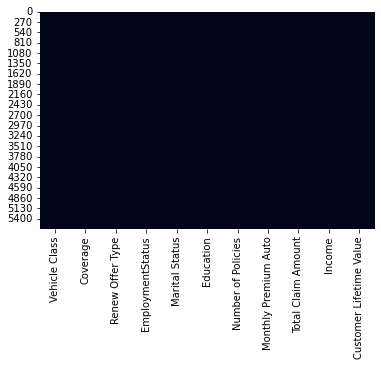

In [431]:
# Missing value heatmap
sns.heatmap(df.isnull(), cbar=False);

In [432]:
display(df.describe(), df.describe(include='object'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


In [433]:
pd.set_option('display.max_colwidth', -1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Vehicle Class,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
1,Coverage,3,"[Extended, Basic, Premium]"
2,Renew Offer Type,4,"[Offer1, Offer3, Offer2, Offer4]"
3,EmploymentStatus,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
4,Marital Status,3,"[Divorced, Married, Single]"
5,Education,5,"[High School or Below, College, Master, Bachelor, Doctor]"
6,Number of Policies,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
7,Monthly Premium Auto,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, 117.0, 78.0, 63.0, 70.0, 71.0, 61.0, 64.0, 129.0, 100.0, 68.0, 126.0, 95.0, 128.0, 84.0, 125.0, 98.0, 97.0, 121.0, 192.0, 69.0, 83.0, 72.0, 67.0, 103.0, 74.0, 89.0, 86.0, 110.0, 124.0, 73.0, 191.0, 122.0, 133.0, 165.0, 127.0, 144.0, 114.0, 194.0, 118.0, 111.0, 138.0, 119.0, 76.0, 80.0, 154.0, 189.0, 130.0, 109.0, 161.0, 88.0, 93.0, 113.0, 87.0, 136.0, 106.0, 99.0, 105.0, 82.0, 96.0, 159.0, 181.0, 146.0, 115.0, 187.0, 108.0, 209.0, 102.0, 104.0, 77.0, 79.0, 283.0, 150.0, 92.0, 91.0, 180.0, 131.0, 112.0, 184.0, 137.0, 185.0, 94.0, 198.0, 135.0, 140.0, 132.0, 139.0, 85.0, 123.0, 214.0, 201.0, 155.0, 193.0, 81.0, ...]"
8,Total Claim Amount,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355.820799, 85.063708, 584.567645, 144.987956, 264.563772, 582.781896, 39.781368, 227.44626, 347.857619, 239.328571, 340.8, 439.2, 307.2, 1178.950186, 480.0, 350.65008, 51.961915, 907.2, 423.787608, 234.683628, 456.0, 614.4, 475.2, 286.781601, 788.206874, 600.0, 265.877583, 513.6, 196.37368, 312.0, 335.840529, 580.8, 1921.248929, 331.2, 389.636991, 229.620398, 159.266473, 291.91645, 321.6, 685.227276, 355.2, 616.005527, 395.729716, 302.4, 287.5426, 528.0, 282.500791, 135.892444, 316.8, 525.6, 604.8, 981.010879, 650.52179, 668.29397, 349.954886, 345.6, 638.4, 1452.213743, 609.6, 93.128128, 297.6, 292.8, 268.471802, 624.023564, 245.447622, 476.903351, 624.711448, 820.431905, 547.2, 469.257835, 1067.291208, 416.2618, 566.4, 40.622304, 497.126827, 314.880326, 938.513425, 307.639408, 482.4, 29.984815, 290.70096, 30.874869, 199.79727, 384.0, 41.464402, 739.2, 571.2, 460.741097, 532.8, 206.810286, 199.851173, 799.2, 142.205246, 114.815893, 44.284642, 336.0, ...]"
9,Income,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, 94389.0, 25419.0, 26477.0, 36615.0, 59624.0, 37813.0, 35624.0, 24910.0, 62739.0, 18608.0, 46210.0, 0.0, 15192.0, 50397.0, 82210.0, 22538.0, 31614.0, 78358.0, 36510.0, 51962.0, 45345.0, 62039.0, 66550.0, 71134.0, 26721.0, 66726.0, 40672.0, 44685.0, 78804.0, 23616.0, 38667.0, 59961.0, 57117.0, 25221.0, 33806.0, 46051.0, 42526.0, 43963.0, 52819.0, 50450.0, 51972.0, 72421.0, 38183.0, 20325.0, 51032.0, 20567.0, 23671.0, 45302.0, 21102.0, 53565.0, 59797.0, 47509.0, 22239.0, 14665.0, 64801.0, 44986.0, 43817.0, 36845.0, 49259.0, 26486.0, 56446.0, 67787.0, 89464.0, 22475.0, 31972.0, 58089.0, 41990.0, 84903.0, 67137.0, 21450.0, 99874.0, 26100.0, 31275.0, 71186.0, 91580.0, 69417.0, 88592.0, 26806.0, 23656.0, 94527.0, 44096.0, 66839.0, 18643.0, 58682.0, 87002.0, 47725.0, 22244.0, 26245.0, 61085.0, 62464.0, 48367.0, 59207.0, 75007.0, 72874.0, 72540.0, ...]"


#### **2_2_Exploratory Data Analysis**

##### **2_2_1_Distribution of Customer Lifetime Value**

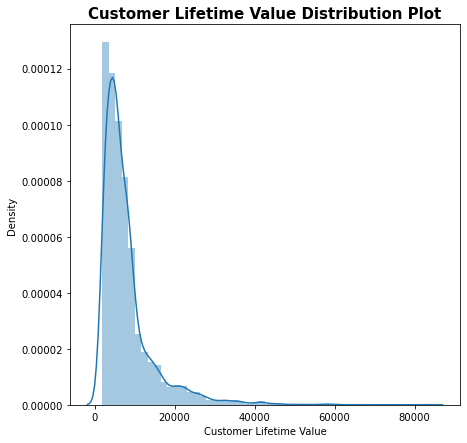

In [434]:
# Plot distribusi fitur 'Customer Lifetime Value'
plt.figure(figsize=(7, 7))
sns.distplot(df['Customer Lifetime Value'])
plt.title('Customer Lifetime Value Distribution Plot', size=15, weight='bold');

Konklusi
Berdasarkan plot distribusi Customer Lifetime Value di atas, terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada fitur Customer Lifetime Value.

##### **2_2_2_Types of Customer related to CLV**

In [435]:
# Cek jumlah Customer berdasarkan tipe asuransi, status pekerjaan, status menikah, dan edukasi
print(f"\nJumlah Customer di tiap Insurance Coverage group:\n{df['Coverage'].value_counts()}")
print(f"\nJumlah Customer di tiap EmploymentStatus group:\n{df['EmploymentStatus'].value_counts()}")
print(f"\nJumlah Customer di tiap Marital Status group:\n{df['Marital Status'].value_counts()}")
print(f"\nJumlah Customer di tiap Education group:\n{df['Education'].value_counts()}")


Jumlah Customer di tiap Insurance Coverage group:
Basic       3477
Extended    1704
Premium     488 
Name: Coverage, dtype: int64

Jumlah Customer di tiap EmploymentStatus group:
Employed         3541
Unemployed       1429
Medical Leave    267 
Disabled         252 
Retired          180 
Name: EmploymentStatus, dtype: int64

Jumlah Customer di tiap Marital Status group:
Married     3305
Single      1514
Divorced    850 
Name: Marital Status, dtype: int64

Jumlah Customer di tiap Education group:
Bachelor                1703
College                 1660
High School or Below    1620
Master                  460 
Doctor                  226 
Name: Education, dtype: int64


Konklusi tipe customer
Kebanyakan Customer sedang memiliki pekerjaan, sudah menikah, dan lulusan S1.

In [436]:
# Cek median clv untuk tiap Employement Status
df_median_clv = df.groupby(by=['EmploymentStatus']).agg({'Customer Lifetime Value':'median'}).reset_index()
df_median_clv = df_median_clv.set_index('EmploymentStatus')
df_median_clv = df_median_clv.sort_values('Customer Lifetime Value', ascending =False)
df_median_clv.head().reset_index()

,EmploymentStatus,Customer Lifetime Value
0,Employed,5879.176092
1,Unemployed,5714.246379
2,Disabled,5585.963531
3,Medical Leave,5253.487908
4,Retired,4904.894731


In [437]:
# Cek mean clv untuk tiap Employement Status
df.groupby('EmploymentStatus').mean()[['Customer Lifetime Value']].sort_values('Customer Lifetime Value',ascending=False)

,Customer Lifetime Value
EmploymentStatus,
Employed,8216.722403
Medical Leave,8048.676877
Disabled,7776.810758
Unemployed,7684.433265
Retired,7422.982546


konklusi Status Pekerjaan
median & mean customer lifetime value tertinggi ada pada customer dengan employment status Employed / memiliki pekerjaan

Education,Bachelor,College,Doctor,High School or Below,Master
EmploymentStatus,,,,,
Disabled,4879.433721,5594.322987,4218.099041,6957.448957,5884.327125
Employed,5898.733666,5788.118159,5509.105600,6230.902189,5711.478251
Medical Leave,4770.739040,5398.046242,9125.863218,5274.200760,5507.242176
Retired,4458.113369,4904.894731,4518.782768,4772.943848,16301.967600
Unemployed,5228.103218,5975.804813,5392.499539,6063.392804,8184.618904


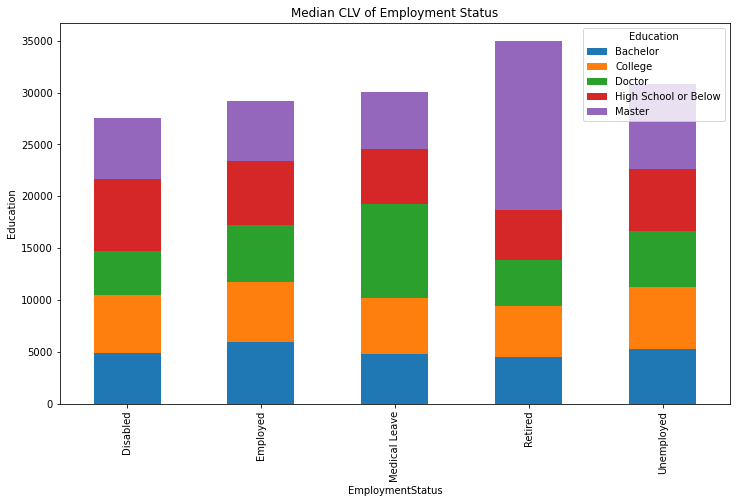

In [438]:
# customer based on status employment & education
from IPython.display import display

neighbour_pivot = df.pivot_table(index='EmploymentStatus', columns='Education', values='Customer Lifetime Value', aggfunc='median')
display(neighbour_pivot)

pivot_plot = neighbour_pivot.plot.bar(stacked=True, figsize=(12, 7))
pivot_plot.set_xlabel('EmploymentStatus')
pivot_plot.set_ylabel('Education')
pivot_plot.set_title('Median CLV of Employment Status');

Status pekerjaan v edukasi
Customer dengan status pekerjaan Retired (pensiun) memiliki CLV median tertinggi untuk setiap tipe employement status. 
Dan seperti yang kita sudah diketahui, rata-rata CLV tertinggi ada pada customer dengan status employed (memiliki pekerjaan)


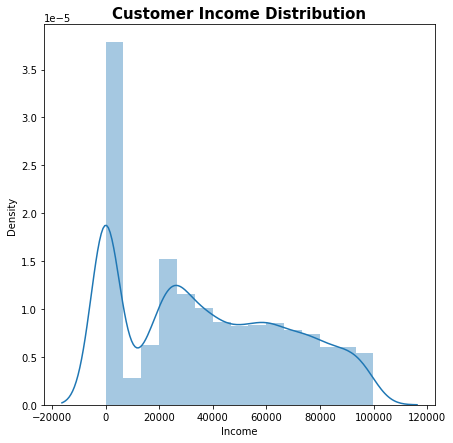

In [439]:
# Plot distribusi fitur 'Income'
plt.figure(figsize=(7, 7))
sns.distplot(df['Income'])
plt.title('Customer Income Distribution', size=15, weight='bold');

In [440]:
df.groupby('EmploymentStatus').mean()[['Income']].sort_values('Income',ascending=False)

,Income
EmploymentStatus,
Employed,56665.612539
Retired,20242.172222
Medical Leave,20087.408240
Disabled,19900.388889
Unemployed,0.000000


Konklusi income
Dari data, banyak yang memiliki income 0, ternyata karena customer yang unemployed memang tidak memiliki penghasilan.
<br>
Rata-rata income paling besar berasal dari kategori employed (memiliki pekerjaan)

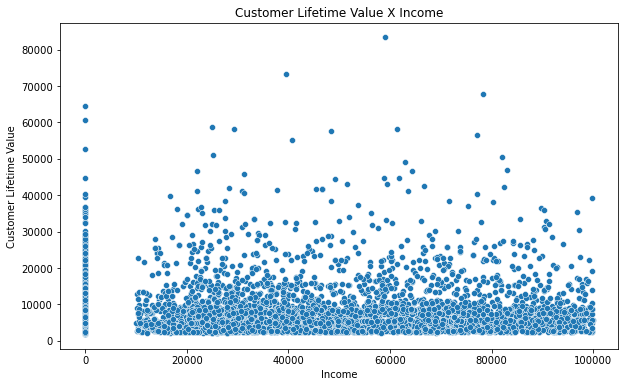

In [441]:
# Plot persebaran 'Income V CLV'
plt.figure(figsize=(10,6))
sns.scatterplot(df['Income'], df['Customer Lifetime Value']).set_title('Customer Lifetime Value X Income');

Income V CLV
dari plot persebaran ini, terlihat tidak ada pola antara income dengan customer lifetime value, jika ada pun tidak langsung terlihat menggunakan mata

##### **2_2_3_Types of Car related to CLV**

In [442]:
# Cek jumlah Customer berdasarkan Tipe Vehicle
print(f"Jumlah Customer di tiap Vehicle Class group:\n{df['Vehicle Class'].value_counts()}")

Jumlah Customer di tiap Vehicle Class group:
Four-Door Car    2858
Two-Door Car     1186
SUV              1096
Sports Car       307 
Luxury SUV       115 
Luxury Car       107 
Name: Vehicle Class, dtype: int64


In [443]:
# mean CLV per Vehicle Class
df.groupby('Vehicle Class').mean()[['Customer Lifetime Value']].sort_values('Customer Lifetime Value',ascending=False).reset_index()

,Vehicle Class,Customer Lifetime Value
0,Luxury SUV,17730.511533
1,Luxury Car,16779.425415
2,Sports Car,11121.754994
3,SUV,10369.130854
4,Two-Door Car,6684.448077
5,Four-Door Car,6641.095206


In [444]:
# median CLV per Vehicle Class
df.groupby('Vehicle Class').median()[['Customer Lifetime Value']].sort_values('Customer Lifetime Value',ascending=False).reset_index()

,Vehicle Class,Customer Lifetime Value
0,Luxury SUV,14854.195520
1,Luxury Car,14510.750500
2,SUV,8628.816326
3,Sports Car,8608.157233
4,Four-Door Car,5319.488900
5,Two-Door Car,5211.711468


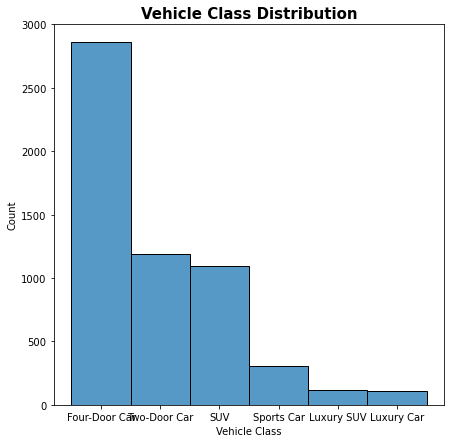

In [445]:
# Plot distribusi fitur 'Vehicle Class'
plt.figure(figsize=(7, 7))
sns.histplot(df['Vehicle Class'])
plt.title('Vehicle Class Distribution', size=15, weight='bold');

Konklusi tipe mobil
- Tipe mobil paling banyak adalah mobil berpintu 4, diikuti dengan mobil berpintu 2 & SUV
- Tipe mobil yang memiliki rata rata CLV & median CLV tertinggi adalah Luxury SUV

### **3_Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

In [446]:
# Membuat duplikasi dataframe
df_model = df.copy()

#### 3_1_Missing Value & Duplicate Treatment

In [447]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Vehicle Class,object,0,0.0,6,"[Sports Car, Two-Door Car]"
1,Coverage,object,0,0.0,3,"[Extended, Premium]"
2,Renew Offer Type,object,0,0.0,4,"[Offer3, Offer2]"
3,EmploymentStatus,object,0,0.0,5,"[Medical Leave, Employed]"
4,Marital Status,object,0,0.0,3,"[Married, Single]"
5,Education,object,0,0.0,5,"[Master, Doctor]"
6,Number of Policies,float64,0,0.0,9,"[1.0, 2.0]"
7,Monthly Premium Auto,float64,0,0.0,191,"[68.0, 219.0]"
8,Total Claim Amount,float64,0,0.0,3274,"[165.75305, 45.152521]"
9,Income,float64,0,0.0,3625,"[22853.0, 20346.0]"


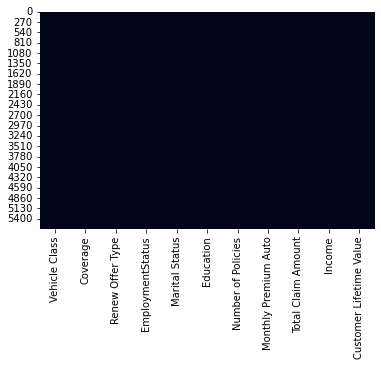

In [448]:
# Missing value heatmap
sns.heatmap(df_model.isnull(), cbar=False);

Konklusi :
- Dari info dataset diatas, dapat disimpulkan bahwa tidak terdapat data kosong pada data ini. maka tidak perlu melakukan treatment pada missing value.
- Dari dataset juga tidak ada data primary key (contoh:id), maka tidak perlu melakukan treatment pada duplicate value

#### 3_2_Statistik Deskriptif
Selanjutya kita juga perlu mengecek apakah terdapat nilai-nilai yang dirasa tidak masuk akal pada setiap fiturnya, misalnya kurang dari 0. pengecekkan ini dilakukan melalui deskriptive statistik.

In [449]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


Konklusi:
- Tidak ada fitur yang memiliki nilai negative. akan tetapi ada 1 fitur yang memiliki nilai minimum sama dengan 0, yaitu 'income'
- Adanya nilai 0 di kolom income masuk akal, karena ada customer yang memiliki status pekerjaan Unemployed / Tidak bekerja.

#### 3_3_Data Correlation
Selanjutnya kita juga perlu mengecek korelasi antara data / fitur yang ada.

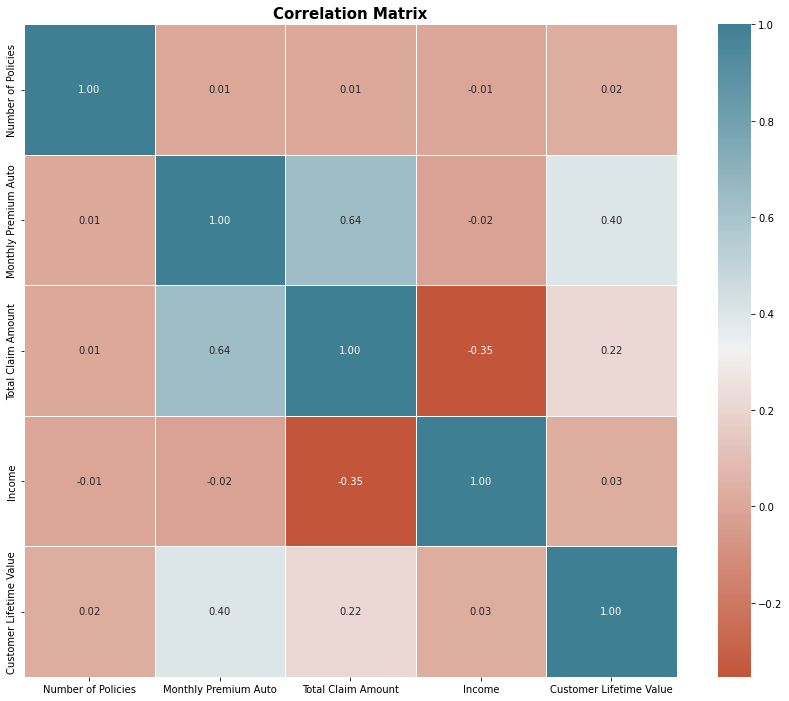

In [450]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Konklusi:
- Correlation matrix menunjukan bahwa tidak ada fitur yang memiliki korelasi kuat terhadap fitur 'Customer Lifetime Value', kecuali fitur 'Monthly Premium Auto' yang memiliki nilai korelasi moderat (Positif 0.4).
- ada juga 2 fitur yang memiliki korelasi moderat, yaitu 'Monthly Premium Auto' dengan 'Total Claim Amount', yaitu di (positif 0.64). yang berarti semakin tinggi 'Monthly Premium Auto' maka 'Total Claim Amount' akan semakin tinggi juga.
- Maka berdasarkan korelasi, tidak perlu terjadi penghapusan fitur.

#### 3_4_Data Outliers
Selanjutnya, kita juga harus melihat apakah ada outliers di data kita.
hal inin dilakukan karena banyak outliers akan mempengaruhi hasil analisis dan pemodelan. 

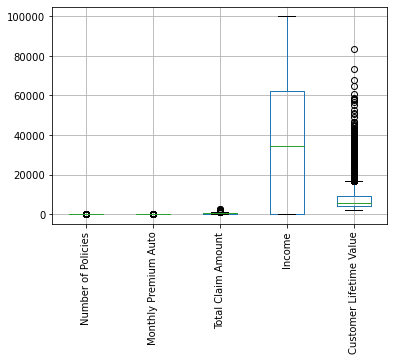

In [451]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90);

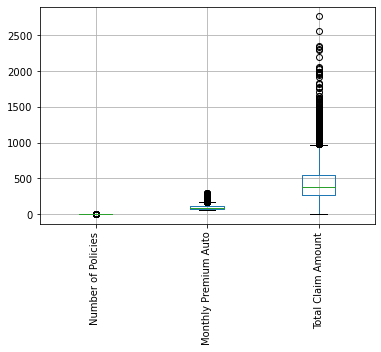

In [452]:
# Plot boxplot untuk mengecek outliers, lebih detail untuk 'Number of Policies','Monthly Premium Auto', dan 'Total Claim Amount'
df_model[['Number of Policies','Monthly Premium Auto','Total Claim Amount']].boxplot(rot=90);

Di fitur fitur numerikal data ini, terlihat ada banyak outlier. Dalam project ini, agar data yang digunakan bersih dari outliers, saya akan melakukan rekayasa pada fitur fitur ini dengan mempertimbangkan kombinasi antara hasil dari metode IQR & domain knowledge. Hasil dari model ini akan memiliki batasan yaitu kemampuan untuk memprediksi customer dengan nilai-nilai pada rentang-rentang berdasarkan data bersih ini saja. di luar rentang data ini, hasil prediksi dari model akan menjadi bias

In [453]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')     

In [454]:
# Outliers pada fitur Customer Lifetime Value
find_anomalies(df_model['Customer Lifetime Value'])

IQR: 5076.870325
limit_bawah: -3660.9609535
limit_atas: 16646.5203465


In [455]:
# Outliers pada fitur Number of Policies
find_anomalies(df_model['Number of Policies'])

IQR: 3.0
limit_bawah: -3.5
limit_atas: 8.5


In [456]:
# Outliers pada fitur Monthly Premium Auto
find_anomalies(df_model['Monthly Premium Auto'])

IQR: 41.0
limit_bawah: 6.5
limit_atas: 170.5


In [457]:
# Outliers pada fitur Total Claim Amount
find_anomalies(df_model['Total Claim Amount'])

IQR: 283.053586
limit_bawah: -157.64783699999998
limit_atas: 974.566507


#### 3_5_Numerikal Feature Engineering
Selanjutnya kita dapat memulai feature enginenering terhadap fitur-fitur numerikal.

**Customer Lifetime Value**

In [458]:
df_model['Customer Lifetime Value'].describe()

count    5669.000000 
mean     8029.874592 
std      6916.708246 
min      1898.007675 
25%      3954.344534 
50%      5800.188903 
75%      9031.214859 
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [459]:
# Cek Customer Lifetime Value > $16646.5203465
df_model[df_model['Customer Lifetime Value'] > 16646.5203465].count()['Customer Lifetime Value']

499

In [460]:
# Percentage diluar IQR
df_model[df_model['Customer Lifetime Value'] > 16646.5203465].count()['Customer Lifetime Value']/df_model['Customer Lifetime Value'].count()

0.08802257893808432

**Konklusi CLV**
<br><br>
Terlihat bahwa ada 75% data pada kolom Customer Lifetime Value bernilai kurang dari 9031, sementara nilai maksimalnya 83.325. berarti ada skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (Positive skewness). Terdapat 499 data yang nilai CLV nya lebih besar dari 16.646 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki CLV lebih besar dari 16.646 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun. 

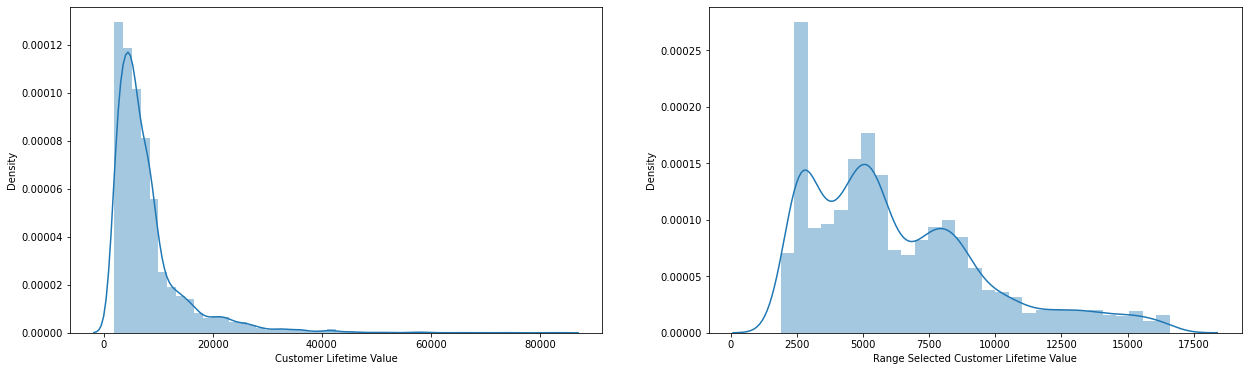

In [461]:
# Melakukan filtering pada data
df_model = df_model[(df_model['Customer Lifetime Value'] <= 16646.5203465)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Customer Lifetime Value'], ax=axes[0])
sns.distplot(df_model['Customer Lifetime Value'], ax=axes[1])
axes[0].set_xlabel('Customer Lifetime Value')
axes[1].set_xlabel('Range Selected Customer Lifetime Value');

In [462]:
# Cek deskriptif statistik kolom 'Customer Lifetime Value' setelah filtering
df_model['Customer Lifetime Value'].describe()

count    5170.000000 
mean     6319.496232 
std      3321.218955 
min      1898.007675 
25%      3722.554623 
50%      5492.043286 
75%      8199.630342 
max      16589.712370
Name: Customer Lifetime Value, dtype: float64

**Number of Policies**

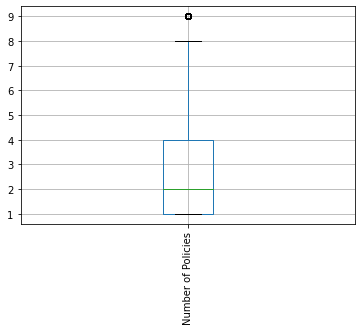

In [463]:
df_model[['Number of Policies']].boxplot(rot=90);

In [464]:
df_model['Number of Policies'].describe()

count    5170.000000
mean     3.050677   
std      2.472473   
min      1.000000   
25%      1.000000   
50%      2.000000   
75%      4.000000   
max      9.000000   
Name: Number of Policies, dtype: float64

In [465]:
# Cek Number of Policies > 8.5
df_model[df_model['Number of Policies'] > 8.5].count()['Number of Policies']

261

In [466]:
# Percentage diluar IQR
df_model[df_model['Number of Policies'] > 8.5].count()['Number of Policies']/df_model['Number of Policies'].count()

0.05048355899419729

**Konklusi Number of Policies**
<br><br>
Terlihat bahwa ada 75% data pada kolom Number of Policies bernilai kurang dari 4, sementara nilai maksimalnya 9. berarti ada skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (Positive skewness). setelah mengurangi data CLV, Terdapat 261 data yang nilai Number of Policies nya lebih besar dari 8,5 (batas atas berdasarkan metode IQR).Oleh karena itu, data yang memiliki Number of Policies lebih besar dari 8,5 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun.

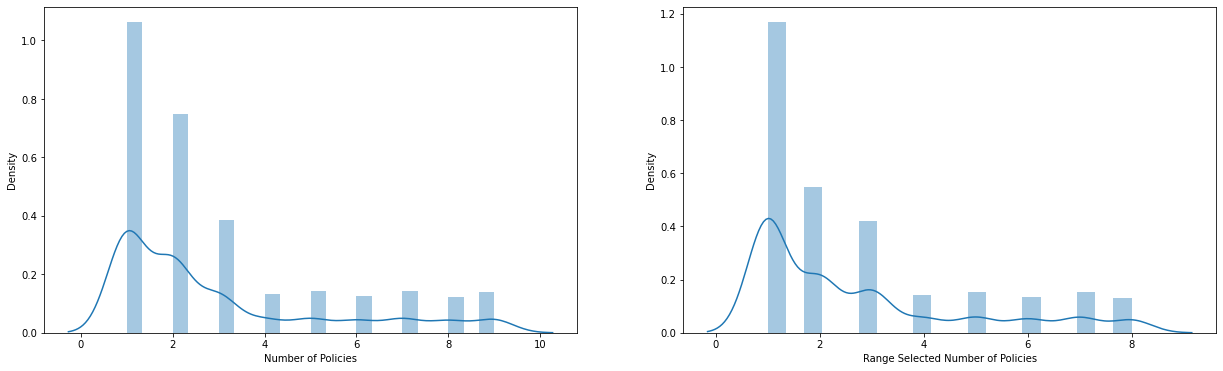

In [467]:
# Melakukan filtering pada data
df_model = df_model[(df_model['Number of Policies'] <= 8.5)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Number of Policies'], ax=axes[0])
sns.distplot(df_model['Number of Policies'], ax=axes[1])
axes[0].set_xlabel('Number of Policies')
axes[1].set_xlabel('Range Selected Number of Policies');

In [468]:
# Cek deskriptif statistik kolom 'Customer Lifetime Value' setelah filtering
df_model['Number of Policies'].describe()

count    4909.000000
mean     2.734365   
std      2.110903   
min      1.000000   
25%      1.000000   
50%      2.000000   
75%      4.000000   
max      8.000000   
Name: Number of Policies, dtype: float64

**Monthly Premium Auto**

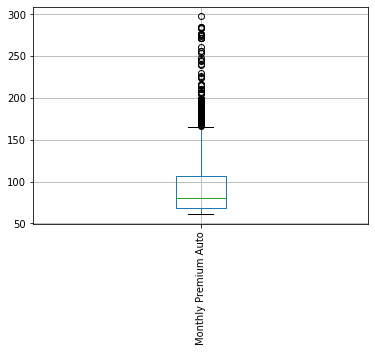

In [469]:
df_model[['Monthly Premium Auto']].boxplot(rot=90);

In [470]:
df_model['Monthly Premium Auto'].describe()

count    4909.000000
mean     90.799756  
std      31.333525  
min      61.000000  
25%      68.000000  
50%      80.000000  
75%      107.000000 
max      297.000000 
Name: Monthly Premium Auto, dtype: float64

In [471]:
# Cek Monthly Premium Auto > 170.5
df_model[df_model['Monthly Premium Auto'] > 170.5].count()['Monthly Premium Auto']

175

In [472]:
# Percentage diluar IQR
df_model[df_model['Monthly Premium Auto'] > 170.5].count()['Monthly Premium Auto']/df_model['Monthly Premium Auto'].count()

0.035648808311265025

**Konklusi Monthly Premium Auto**
<br><br>
Terlihat bahwa ada 75% data pada kolom Monthly Premium Auto bernilai kurang dari 107, sementara nilai maksimalnya 197. berarti ada skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (Positive skewness). setelah mengurangi data CLV, Terdapat 175 data yang nilai Monthly Premium Auto nya lebih besar dari 170.5 (batas atas berdasarkan metode IQR).Oleh karena itu, data yang memiliki Monthly Premium Auto lebih besar dari 170.5 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun.

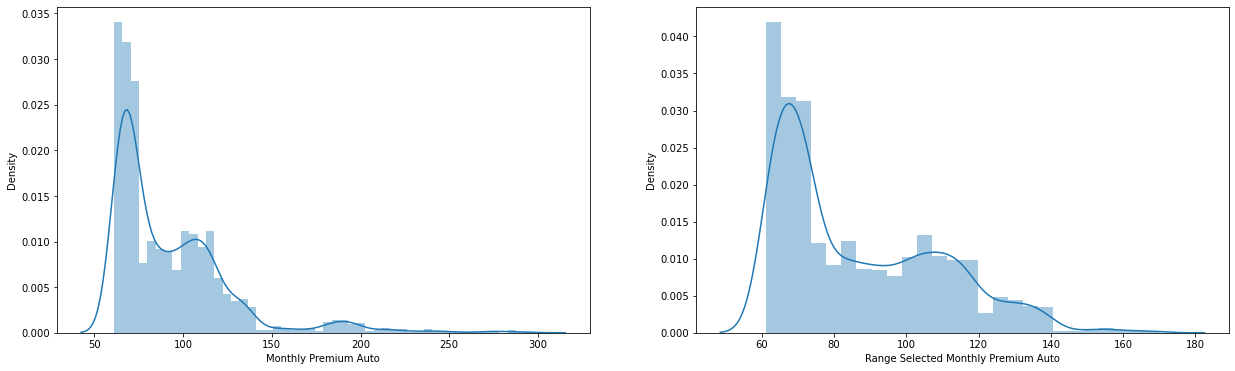

In [473]:
# Melakukan filtering pada data
df_model = df_model[(df_model['Monthly Premium Auto'] <= 170.5)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Monthly Premium Auto'], ax=axes[0])
sns.distplot(df_model['Monthly Premium Auto'], ax=axes[1])
axes[0].set_xlabel('Monthly Premium Auto')
axes[1].set_xlabel('Range Selected Monthly Premium Auto');

In [474]:
# Cek deskriptif statistik kolom 'Customer Lifetime Value' setelah filtering
df_model['Monthly Premium Auto'].describe()

count    4734.000000
mean     86.692438  
std      22.644993  
min      61.000000  
25%      68.000000  
50%      78.000000  
75%      104.000000 
max      170.000000 
Name: Monthly Premium Auto, dtype: float64

**Total Claim Amount**

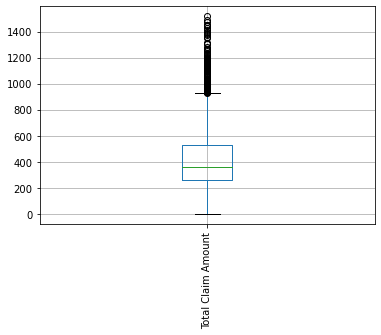

In [475]:
df_model[['Total Claim Amount']].boxplot(rot=90);

In [476]:
df_model['Total Claim Amount'].describe()

count    4734.000000
mean     399.911116 
std      233.370887 
min      0.423310   
25%      259.622260 
50%      364.800000 
75%      528.000000 
max      1516.383753
Name: Total Claim Amount, dtype: float64

In [477]:
# Cek Total Claim Amount > 974.566507

df_model[df_model['Total Claim Amount'] > 974.566507
].count()['Total Claim Amount']

104

In [478]:
# Percentage diluar IQR
df_model[df_model['Total Claim Amount'] > 974.566507].count()['Total Claim Amount']/df_model['Total Claim Amount'].count()

0.021968736797634135

**Konklusi Total Claim Amount**
<br><br>
Terlihat bahwa ada 75% data pada kolom Customer Lifetime Value bernilai kurang dari 528, sementara nilai maksimalnya 1516. berarti ada skewness pada distribusinya, yaitu tail yang memanjang di sebelah kana (Positive skewness). Terdapat 104 data yang nilai Total Claim Amount nya lebih besar dari 974.566507 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki Total Claim Amount lebih besar dari 974.566507 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun. 

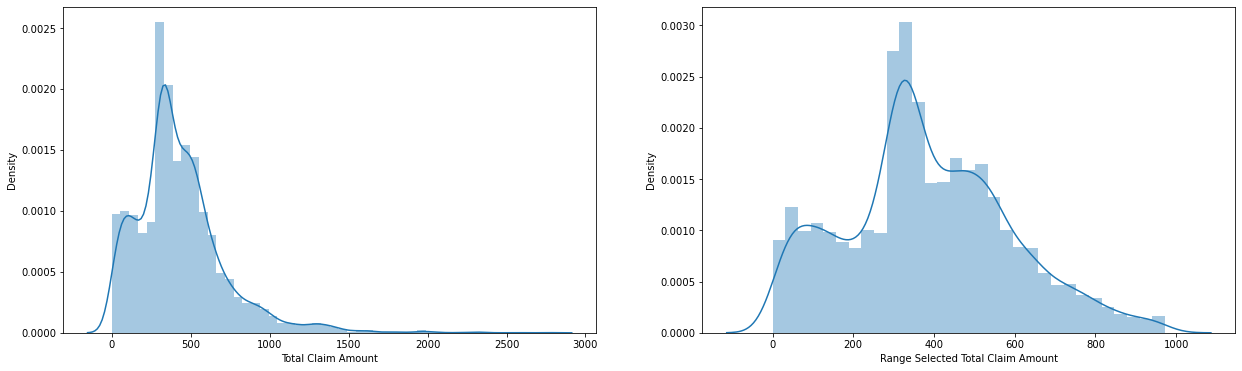

In [479]:
# Melakukan filtering pada data
df_model = df_model[(df_model['Total Claim Amount'] <= 974.566507)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Total Claim Amount'], ax=axes[0])
sns.distplot(df_model['Total Claim Amount'], ax=axes[1])
axes[0].set_xlabel('Total Claim Amount')
axes[1].set_xlabel('Range Selected Total Claim Amount');

In [480]:
# Cek deskriptif statistik kolom 'Customer Lifetime Value' setelah filtering
df_model['Total Claim Amount'].describe()

count    4630.000000
mean     383.073130 
std      205.743648 
min      0.423310   
25%      254.184022 
50%      355.200000 
75%      518.400000 
max      972.000000 
Name: Total Claim Amount, dtype: float64

**Clean Dataset**

In [481]:
# Cek dataset yang sudah bersih
df_model.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [482]:
# Cek kembali info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4630 entries, 0 to 5666
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            4630 non-null   object 
 1   Coverage                 4630 non-null   object 
 2   Renew Offer Type         4630 non-null   object 
 3   EmploymentStatus         4630 non-null   object 
 4   Marital Status           4630 non-null   object 
 5   Education                4630 non-null   object 
 6   Number of Policies       4630 non-null   float64
 7   Monthly Premium Auto     4630 non-null   float64
 8   Total Claim Amount       4630 non-null   float64
 9   Income                   4630 non-null   float64
 10  Customer Lifetime Value  4630 non-null   float64
dtypes: float64(5), object(6)
memory usage: 434.1+ KB


Konklusi Clean Data:
Pada akhirnya tersisa 4630 baris data dari 5669 baris data. berarti sekitar 18% dari data sudah tereliminasi dengasn asumsi dan argumen yang disampaikan di proses sebelumnya

### **4_Modelling**

In [483]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#### **4_1_Encoding**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [484]:
# ordinal mapping
ordinal_mapping = [
    {'col':'Education', 'mapping':{'Doctor':1, 'Master':2, 'Bachelor':3, 'College':4,'High School or Below':5, None:0}} 
] 

# Mengubah fitur kategorikal menjadi numerikal
transformer = ColumnTransformer([
    ('ordinal', OrdinalEncoder(cols=['Education'], mapping=ordinal_mapping), ['Education']),
    ('onehot', OneHotEncoder(drop='first'), ['Vehicle Class','Coverage','Renew Offer Type','EmploymentStatus','Marital Status']),
], remainder='passthrough')

#### **4_2_Data Splitting**

In [485]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['Customer Lifetime Value'], axis=1)
y = df_model['Customer Lifetime Value']

#### **4_3_Train and Test Splitting**

In [486]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

#### **4_4_Choose a Benchmark Model**

In [487]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-2930.36970757 -3256.6654568  -2708.99619257 -2956.05125919
 -2806.9590324 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-2034.94567146 -2238.12613529 -1934.01501646 -2098.00476462
 -1999.55085496] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.32597029 -0.33793418 -0.33162715 -0.34142317 -0.32516004] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-2905.89997178 -3070.10789954 -2765.06320404 -2814.01742487
 -2780.31126731] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-1923.02662544 -1992.93925568 -1874.85519065 -1866.39097897
 -1891.24140025] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                    

In [488]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-2931.808330,185.124033,-2060.928489,103.269556,-0.332423,0.006425
1,KNN Regressor,-2867.079954,112.675813,-1909.690690,45.906261,-0.326276,0.010691
2,DecisionTree Regressor,-1285.425110,43.692277,-406.591292,26.772172,-0.050808,0.002231
3,RandomForest Regressor,-914.642689,95.176471,-321.291203,24.790371,-0.038607,0.002599
4,XGBoost Regressor,-934.067995,79.972761,-348.053772,17.501954,-0.045498,0.002194


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Melihat mean dan standard deviasi, dan berdasarkan nilai RMSE, MAE, dan MAPE, bisa di konklusikan bahwa XGBoost adalah model terbaik.
- Selanjutnya, akan dilakukan prediksi pada test set dengan benchmark model terbaik, yaitu XGBoost. 


#### **4_5_Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost

XGBoost (extreme gradient Boosting) :
adalah sebuah metode machine learning menggunakann gradient boosting decision tree algorithm. 
- Boosting adalah sebuah teknik Ensemble dimana model baru akan ditambah kedalam sebuah model awal, dengan tujuan membenarkan error / kesalahan dari model awal. 
- Sementara Gradiant boosting adalah cara dimana model baru yang dibuat akan mencoba memprediksi residual / error dari model awal, yang kemudian di gabung untuk membuat prediksi final. model ini disebut gradient boosting karena menggunakan 'gradient descent algorithm' untuk meminimalisir kehilangan saat menambahkan model baru.

In [489]:
# Benchmark model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,1008.401344,439.038784,0.062233


#### **4_6_Hyperparameter Tuning**

Selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

In [490]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [491]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [492]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinal',
                                                                               OrdinalEncoder(cols=['Education'],
                                                                                              mapping=[{'col': 'Education',
                                                                                                        'mapping': {None: 0,
                                                                                                                    'Bachelor': 3,
                                                                                                                    'College': 4,
                                                                                                                    'Doctor': 1,
                                                                                                                    'High School or Below': 5,
                                                                                                                    'Master': 2}}]),
                                                                               ['Education']),
                                                                              ('on...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [493]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
17,1.706770,0.296899,0.016772,0.001111,0.6,0.001,190,5,0.04,9,...,22.621749,2,-0.042598,-0.047521,-0.044270,-0.047537,-0.047905,-0.045966,0.002139,2
7,0.995383,0.015830,0.016003,0.002096,0.9,0.059948,119,8,0.05,5,...,15.931216,1,-0.044739,-0.044383,-0.043457,-0.044679,-0.045587,-0.044569,0.000685,1
24,0.409409,0.004714,0.013921,0.001191,0.9,10.0,146,4,0.06,5,...,25.046060,3,-0.051783,-0.062342,-0.059840,-0.062580,-0.061009,-0.059511,0.003988,3
22,0.354977,0.002623,0.013851,0.000990,0.7,0.002783,155,4,0.25,8,...,21.970569,6,-0.070305,-0.074252,-0.076449,-0.080941,-0.081192,-0.076628,0.004125,6
23,0.347491,0.010487,0.014879,0.000984,0.9,3.593814,153,4,0.33,9,...,14.680752,5,-0.072592,-0.072038,-0.076962,-0.077691,-0.079853,-0.075827,0.003026,4


In [494]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -890.2531245624041
Best_params: {'model__subsample': 0.6, 'model__reg_alpha': 0.001, 'model__n_estimators': 190, 'model__max_depth': 5, 'model__learning_rate': 0.04, 'model__gamma': 9, 'model__colsample_bytree': 0.9}


#### **4_7_Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [495]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,958.693903,389.499574,0.048459


#### **4_8_Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [496]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,1008.401344,439.038784,0.062233


In [497]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,958.693903,389.499574,0.048459


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukanya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning: 1008.401344,     439.038784,     0.062233
- RMSE, MAE & MAPE setelah tuning: 958.693903,      389.499574,     0.048459

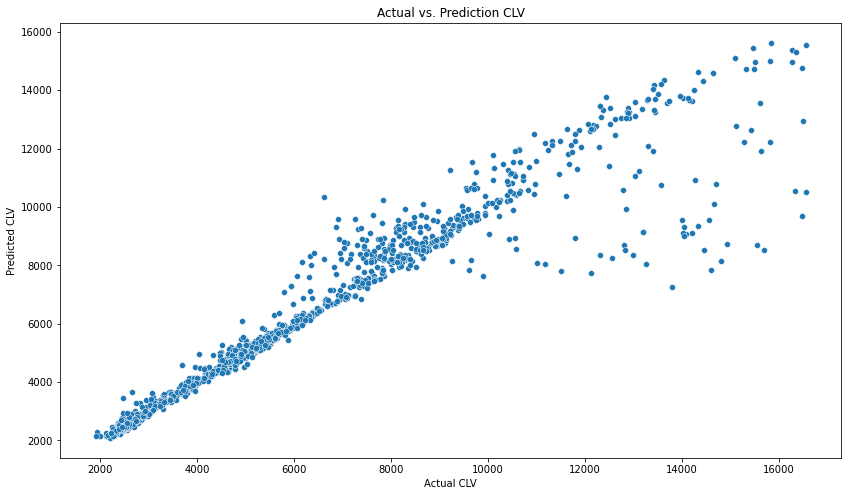

In [498]:
# Plot actual CLV vs Predicted CLV

plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction CLV', 
                                               xlabel='Actual CLV', 
                                               ylabel='Predicted CLV');

#### **4_9_Feature Importances**
Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (CLV), kita dapat mengeceknya melalui function feature_importances_.

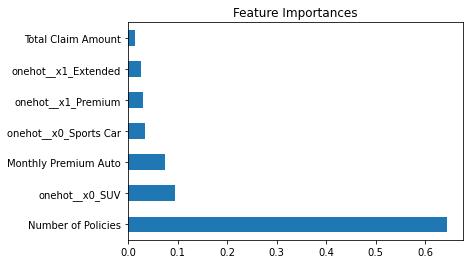

In [499]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head(7)
feature_imp.plot(kind='barh', title='Feature Importances');

### **5_Conclusion**

Berdasarkan pemodelan yang sudah dilakukan, fitur 'Number of Policies' dan 'Vehicle Class' menjadi fitur yang paling berpengaruh terhadap 'Customer Lifetime Value' atau CLV.

Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~4%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan Customer Lifetime Value pada rentang nilai seperti yang dilatih terhadap model (maksimal nilai CLV 16.646), maka perkiraan CLVnya rata-rata akan meleset kurang lebih sebesar 4% dari CLV seharusnya. 

Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara CLV aktual dan prediksi, terutama diatas CLV 8.000. Bias yang dihasilkan oleh model ini dikarenakan oleh terbatasnya fitur pada dataset yang bisa merepresentasikan aspek customer dan juga kendaraan.

Ada juga beberapa limitasi yang tercipta karena nilai yang dipake untuk melatih model ini, seperti:
- Nilai Customer Lifetime Value maksimal 16.646.
- Nilai Numbers of policy maksimal 8.5.
- Nilai Monthly Premium Auto maksimal 170.5
- Nilai Total Claim Amount maksimal 974.566507

Model ini tentu masih dapat diperbagus agar dapat menghasilkan prediksi yang lebih baik lagi. Namun, kita dapat melakukan komparasi data real terhadap model yang sudah dibuat pada project ini untuk mengetahui tingkat efektifitas penggunaan model memprediksi CLV. Nantinya, dari hasil komparasi, kita bisa mendapatkan insight lainnya terkait perihal yang bisa dan harus diperbaiki pada model.  


### **6_Recommendations**

    Lakukan Komparasi data real dengan model yang sudah dibuat di masa depan.

Lalu, hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:
1. penambahan fitur yang lebih korelatif dengan target ('Customer Lifetime Value'), bisa seperti umur kendaraan, policy length, atau daerah tinggal customer. serta penambahan data terkini dapat meningkatkan kapasitas prediksi dari model.

2. Mencoba algoritma ML yang lain serta melakukan hyperparameter tuning kembali

3. Menggunakan model yang lebih rumit, namun harus diiringi dengan penambahan jumlah data & penambahan jumlah fitur yang berkorelasi dengan target ('Customer Lifetime Value').

4. Menganalisa data-data yang memiliki error tinggi saat di prediksi dengan model kita. lalu melakukan analisa hubungan antara error tersebut dengan setiap variable independen. Hal ini dilakukan dengan harapan untuk mengetahui sebenarnya variable mana saja yang menyebabkan error yang tinggi.
 

#### **Save Model**

In [503]:
# Save model
# import pickle

# estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
# estimator.fit(X_train, y_train)

# pickle.dump(estimator, open('Customer_Lifetime_Value_XGB.sav', 'wb'))

In [504]:
# Load model
# filename = 'Customer_Lifetime_Value_XGB.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [505]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

1008.7818059917497